# Machine Learning - Regression Models

We will mention regression models below.

- Linear Regression

- Multiple Linear Regression

- Ridge Regression

- Lasso Regression

- ElasticNet Regression



## Simple Linear Regression

![Linear Regression](./linear-regression.jpeg)

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications. This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine.

If the goal is prediction, forecasting, or error reduction,[clarification needed] linear regression can be used to fit a predictive model to an observed data set of values of the response and explanatory variables.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares cost function as in ridge regression (L2-norm penalty) and lasso (L1-norm penalty). Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely linked, they are not synonymous.

**Formula:**

$$
\begin{aligned}
Y_{i} &= \beta_0 + \beta_1 X_{1}
\end{aligned}
$$

**Source** : [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)

In [29]:
import pandas as pd 
df = pd.read_csv("../dataset/Advertising.csv")
df = df.iloc[:, 1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


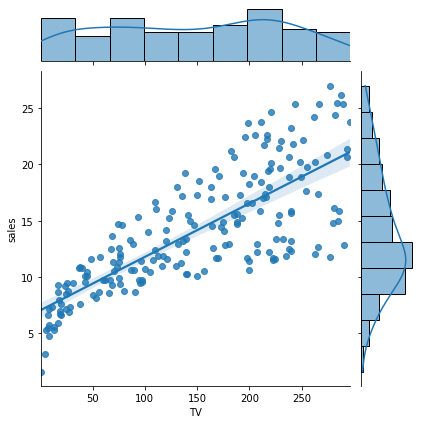

In [32]:
import seaborn as sns
sns.jointplot(x= "TV", y="sales", data=df, kind="reg")

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
X = df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [35]:
y = df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [36]:
reg = LinearRegression()

In [37]:
model = reg.fit(X,y)

In [38]:
# This usage will give he attribute of the model
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [39]:
# Beta value of our equation
model.intercept_

array([7.03259355])

In [40]:
# Coefficient of our equation
model.coef_

array([[0.04753664]])

In [41]:
# Defining R2
model.score(X,y)

0.611875050850071

### Prediction - Simple Linear Regression

/Users/seneralkan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 28.27)

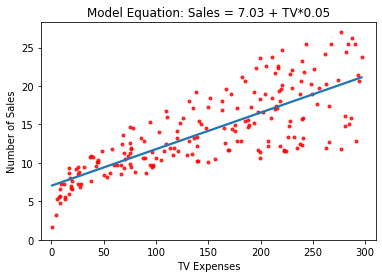

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={"color": "r", "s": 9})
g.set_title("Model Equation: Sales = 7.03 + TV*0.05")
g.set_ylabel("Number of Sales")
g.set_xlabel("TV Expenses")
plt.xlim(-10, 310)
plt.ylim(bottom = 0)

In [44]:
model.predict([[165]])

array([[14.87613922]])

In [45]:
new_data = [[5], [15], [30]]
model.predict(new_data) 

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

### Errors and Residual

**MSE : Mean Square Error**
The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

$$
\begin{aligned}
MSE  = \frac{1}{n}\sum_{t=1}^{n}e_t^2 
\end{aligned}
$$

**RMSE: Root Mean Square Error**

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

$$
\begin{aligned}
RMSE = \sqrt{ \frac{1}{N}\sum_{i=1}^{N} (x_{i})^2}
\end{aligned}
$$

![RMSE](./rmse.png)


**Source:**
[StatisticHowTo](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error/)

In [49]:
# Checking and defining the Predicted Y and Real Y values
real_y = y[0:10]
pred_y = pd.DataFrame(model.predict(X)[0:10])
errors = pd.concat([real_y, pred_y], axis=1)
errors.columns = ["Real Y", "Predicted Y"]
errors

,Real Y,Predicted Y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [51]:
# Let's check the errors
errors["Error"] = errors["Real Y"] - errors["Predicted Y"]
errors

,Real Y,Predicted Y,Error
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [52]:
# Let's check the square error
errors["Square Error"] = errors["Error"]**2
errors

,Real Y,Predicted Y,Error,Square Error
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [53]:
# Let's check the mean squared error
import numpy as np
np.mean(errors["Square Error"])

9.290350329638105

## Multiple Linear Regression

Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression (MLR) is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable.

**What Multiple Linear Regression Can Tell You**

Simple linear regression is a function that allows an analyst or statistician to make predictions about one variable based on the information that is known about another variable. Linear regression can only be used when one has two continuous variables—an independent variable and a dependent variable.

- There is a linear relationship between the dependent variables and the independent variables

- The independent variables are not too highly correlated with each other

- yi observations are selected independently and randomly from the population

- Residuals should be normally distributed with a mean of 0 and variance σ


![Multiple Linear Regression](./multiple-linear-regression.png)


**Formula:**


$$
\begin{aligned}
Y_{i} &= \beta_0 + \beta_1 X_{1} + \beta_2 X_{2} ... + \beta_n X_{n} + \epsilon
\end{aligned}
$$


**Source:**

- [Investopia](https://www.investopedia.com/terms/m/mlr.asp)

- [Image: Medium](https://medium.com/@ekrem.hatipoglu/machine-learning-prediction-algorithms-multiple-linear-regression-part-3-c25a5a4205b6)


In [54]:
import pandas as pd 
df = pd.read_csv("../dataset/Advertising.csv")
df = df.iloc[:, 1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [56]:
X = df.drop("sales", axis= 1)
y= df[["sales"]]

In [57]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [58]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [59]:
# Model Building with statsmodel
import statsmodels.api as sm
lm = sm.OLS(y,X)

In [60]:
model = lm.fit()

In [63]:
# Let's check the model summary
# R2 value is high that means independent variable is well selected data four our sales
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Sat, 31 Jul 2021   Prob (F-statistic):                   2.43e-171
Time:                        13:01:23   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Model building with sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [65]:
model = lm.fit(X,y)

In [67]:
model.intercept_

array([2.93888937])

In [68]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

In [69]:
# Prediction
# Equation : Sales = 2.94 + TV*0.04 + radio*0.19 - newspaper*0.001
n_data = [[30], [10], [40]]
n_data = pd.DataFrame(n_data).T

In [70]:
n_data

,0,1,2
0,30,10,40


In [71]:
model.predict(n_data)

array([[6.15562918]])

In [72]:
from sklearn.metrics import mean_squared_error
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [73]:
model.predict(X)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [74]:
MSE = mean_squared_error(y, model.predict(X))
MSE

2.784126314510936

In [75]:
RMSE = np.sqrt(MSE)
RMSE

1.6685701407225697

### Model Tuning

In [76]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [77]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)
X_train.head()

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [85]:
y_train.head()

,sales
79,11.0
197,12.8
38,10.1
24,9.7
122,11.6


In [86]:
lm = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.644727765644337

In [88]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.7815996615334504

In [94]:
# K fold Cross Validation
from sklearn.model_selection import cross_val_score

In [102]:
cv_mse =np.mean(-cross_val_score(model, X_train, y_train, cv=10, scoring="neg_mean_squared_error"))
cv_mse

2.958770138679757

In [103]:
cv_rmse = np.sqrt(cv_mse)
cv_rmse

1.720107595088097

## Ridge Regression

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where independent variables are highly correlated.

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from
the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors. It is hoped that the net effect will be to give estimates that are more reliable.

Multicollinearity, or collinearity, is the existence of near-linear relationships among the independent variables. Multicollinearity can create inaccurate estimates of the regression coefficients, inflate the standard errors of the regression coefficients, deflate the partial t-tests for the regression coefficients, give false, nonsignificant, pvalues, and degrade the predictability of the model.

- Lasso and Ridge regression, also known as L1 & L2 respectively, are “regularization” techniques.

- The goal of regularization is to improve the overall fit by increasing “bias” to reduce “variance”, by adding a penalty that scales with model complexity.

- Applying this to linear regression, we start with a line through our data.

- We calculate the residuals per usual.

- Then the penalty is calculated.  For Lasso, the penalty scales with the absolute value of the slope, and for Ridge it scales with the slope squared.

$$
\begin{align}
    
    Penalty  &= alpha * |slope|
\end{align}
$$


- The penalty is added to our residual, and then the algorithm proceeds via the least-squares method.


**Source:**

[NCSS](https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf)

[Segura](https://thaddeus-segura.com/lasso-ridge/)

In [104]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

In [115]:
df = pd.read_csv("../dataset/Hitters.csv")
df = df.dropna()
df.describe().T


,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [116]:
# Transforming categorical data to dummy data
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
dms

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [117]:
y = df["Salary"]

In [118]:
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = 0.2,
random_state =42)

In [120]:
df.shape

(263, 20)

In [121]:
ridge_model = Ridge(alpha= 0.2).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.2)

In [122]:
ridge_model.coef_

array([-1.48080044e+00,  7.42729713e+00,  4.77878346e+00, -2.85529620e+00,
       -1.43856595e+00,  5.55253377e+00,  8.03562322e+00, -2.29900496e-01,
        1.06550455e-01, -4.74671583e-01,  1.68823767e+00,  9.43466253e-01,
       -8.19965884e-01,  2.47995517e-01,  2.25761995e-01, -6.46166811e-01,
        1.05523417e+02, -1.13362417e+02, -6.14364457e+01])

In [123]:
ridge_model.intercept_

16.524408759045173

In [125]:
lambdas = 10**np.linspace(10,-2,100)*0.5
lambdas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [126]:
ridge_model = Ridge()
coef = []

for i in lambdas:
    ridge_model.set_params(alpha =i)
    ridge_model.fit(X_train, y_train)
    coef.append(ridge_model.coef_)

Text(0, 0.5, 'coef')

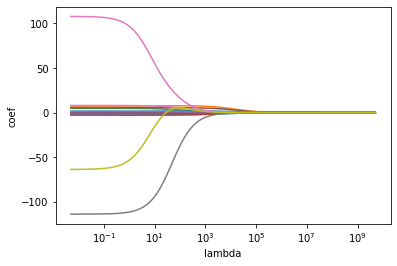

In [132]:
ax = plt.gca()
ax.plot(lambdas, coef)
ax.set_xscale("log")
plt.xlabel("lambda")
plt.ylabel("coef")

In [133]:
# Prediction
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_train)
y_pred[0:10]

array([ 187.39891833,  275.48077368,  610.32449914,  640.50826239,
        699.65326038,  139.65283774, 1148.97445821, 1814.77790853,
        418.74062727,  892.19939042])

In [134]:
y_train[0:10]

226     175.000
220     140.000
128     662.500
222     800.000
81      450.000
19      135.000
74      933.333
163    2412.500
122     400.000
282      90.000
Name: Salary, dtype: float64

In [136]:
RMSE = np.sqrt(mean_squared_error(y_train,y_pred))
RMSE

291.8441962951193

In [139]:
# Train RMSE
cv_rmse =np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))
cv_rmse

339.9045394829296

In [140]:
# Test RMSE
y_pred = ridge_model.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE_test

357.65399071247145

In [141]:
# Model Tuning
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)


In [143]:
lambda_1 = np.random.randint(0,1000, 100)

In [144]:
lambda_2 = 10 ** np.linspace(10,-2,100)*0.5 

In [145]:
ridgecv = RidgeCV(alphas= lambda_2, scoring = "neg_mean_squared_error", cv=10, normalize=True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [146]:
#Optimum Lambda value
ridgecv.alpha_

0.5748784976988678

In [147]:
# Final Model
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

# Test RMSE
y_pred = ridge_tuned.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE_test

357.8535349417143

## Lasso Regression

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models. On the other hand, L2 regularization (e.g. Ridge regression) doesn’t result in elimination of coefficients or sparse models. This makes the Lasso far easier to interpret than the Ridge.


In [188]:
df = pd.read_csv("../dataset/Hitters.csv")
df = df.dropna()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [189]:
# Transforming categorical data to dummy data
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = 0.2,
random_state =42)

In [191]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [192]:
from sklearn.linear_model import Lasso
lasso_model = Lasso().fit(X_train, y_train)

/Users/seneralkan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8948037.68109559, tolerance: 4367.0488194499285
  model = cd_fast.enet_coordinate_descent(


In [193]:
lasso_model.intercept_

16.123468087580136

In [194]:
lasso_model.coef_

array([  -1.46165627,    7.25634163,    4.30437175,   -2.64980211,
         -1.29565969,    5.46042412,    8.5688477 ,   -0.24948275,
          0.20377942,   -0.31412034,    1.62293613,    0.88551842,
         -0.78556076,    0.24720154,    0.22882787,   -0.57101322,
         79.78050994, -109.33858133,  -35.39640246])

In [ ]:
# Let's observe the coefficient for diffrent lambda values
lasso = Lasso()
coefs = []
alphas = 10 ** np.linspace(10,-2,100)*0.5 

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

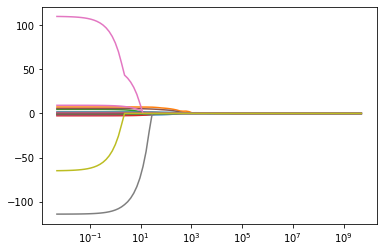

In [196]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

In [197]:
# Prediction
lasso_model

Lasso()

In [198]:
lasso_model.predict(X_train)[0:5]

array([191.71955216, 277.48029442, 607.68571851, 636.0958208 ,
       698.0228856 ])

In [199]:
lasso_model.predict(X_test)[0:5]

array([593.7232101 , 683.99852978, 896.98562836, 413.00933119,
       338.21411449])

In [200]:
y_pred = lasso_model.predict(X_test)

In [201]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.2951936863053

In [202]:
r2_score(y_test, y_pred)

0.2941978483635682

In [203]:
# Model Tuning
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(cv=10, max_iter=100000).fit(X_train, y_train)
lasso_cv_model.alpha_ # optimum alpha value

589.8609441184583

In [206]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [207]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

375.01395528291675

In [208]:
# It will show the coefficient for the each independent variables
pd.Series(lasso_tuned.coef_, index = X_train.columns)

AtBat          0.000000
Hits           2.555954
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.270164
Years          0.000000
CAtBat        -0.276755
CHits          0.626663
CHmRun         0.000000
CRuns          0.731251
CRBI           0.655162
CWalks        -0.000000
PutOuts        0.258833
Assists        0.028761
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

## ElasticNet Regression

The elastic net algorithm uses a weighted combination of L1 and L2 regularization. As you can probably see, the same function is used for LASSO and Ridge regression with only the L1_wt argument changing. This argument determines how much weight goes to the L1-norm of the partial slopes. If the regularization is pure L2 (Ridge) and if L1_wt = 1.0 the regularization is pure L1 (LASSO).

**Source:**
[Medium](https://towardsdatascience.com/ridge-lasso-and-elasticnet-regression-b1f9c00ea3a3)

In [209]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [210]:
df = pd.read_csv("../dataset/Hitters.csv")
df = df.dropna()
# Transforming categorical data to dummy data
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = 0.2,
random_state =42)


In [211]:
enet_model = ElasticNet().fit(X_train, y_train)

/Users/seneralkan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9219929.076529382, tolerance: 4367.0488194499285
  model = cd_fast.enet_coordinate_descent(


In [212]:
enet_model.intercept_

9.660172331609601

In [213]:
enet_model.coef_

array([ -1.61694103,   7.46019777,   2.60346369,  -2.49584787,
        -0.49720266,   5.38019309,   6.07654408,  -0.23306998,
         0.07107404,  -0.60880473,   1.74638227,   0.99206863,
        -0.75861262,   0.2545778 ,   0.2288989 ,  -0.82299964,
        15.41006115, -35.23558671,   4.76373134])

In [214]:
# Prediction and Modelling
enet_model.predict(X_train)[0:10]

array([ 241.15308757,  220.56764821,  563.6755985 ,  592.85869297,
        673.58227241,  161.2935016 , 1141.66334518, 1806.74810227,
        490.14928686,  920.08947604])

In [215]:
enet_model.predict(X_test)[0:10]

array([546.84974647, 605.88596734, 905.61750212, 359.00782512,
       414.76638269, 294.56108553, 594.81315714, 437.72592886,
       854.59139739, 780.11069362])

In [216]:
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.78780126428234

In [217]:
r2_score(y_test, y_pred)

0.2962010344606606

In [218]:
# Model Tuning
enet_cv_model = ElasticNetCV(cv=10).fit(X_train, y_train)

In [219]:
enet_cv_model.alpha_

1179.7218882369157

In [220]:
enet_cv_model.intercept_

-42.00169883288038

In [221]:
enet_cv_model.coef_

array([ 0.53595446,  0.68349754,  0.        ,  0.        ,  0.        ,
        0.16108801,  0.        , -0.27013471,  0.67433246,  0.        ,
        0.62871291,  0.62195514,  0.        ,  0.26594528,  0.00758307,
       -0.        ,  0.        , -0.        ,  0.        ])

In [222]:
pd.Series(enet_cv_model.coef_, index = X_train.columns)

AtBat          0.535954
Hits           0.683498
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.161088
Years          0.000000
CAtBat        -0.270135
CHits          0.674332
CHmRun         0.000000
CRuns          0.628713
CRBI           0.621955
CWalks         0.000000
PutOuts        0.265945
Assists        0.007583
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

In [224]:
# Final Model
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train, y_train)
y_pred = enet_tuned.predict(X_test)

In [225]:
np.sqrt(mean_squared_error(y_test, y_pred))

378.23482159854797

In [226]:
?ElasticNet

Init signature:
ElasticNet(
    alpha=1.0,
    *,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read